<a href="https://colab.research.google.com/github/Anujthe8/Predictive-Pulse-Harnessing-Machine-Learning-for-Blood-Pressure-Analysis/blob/main/Predictive_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
#importing data
df = pd.read_csv('/content/patient_data.csv')

In [387]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [388]:
df.rename(columns={'C': 'Gender'}, inplace=True)

In [389]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [391]:
df.shape

(1825, 14)

In [392]:
#checking all the null value
df.isnull().sum()

,0
Gender,0
Age,0
History,0
Patient,0
TakeMedication,0
Severity,0
BreathShortness,0
VisualChanges,0
NoseBleeding,0
Whendiagnoused,0


In [393]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NoRMAL'], dtype=object)

In [394]:
df['Stages'].replace({ 'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
              'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'},inplace=True)

In [395]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NoRMAL'], dtype=object)

In [396]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,2,3,2,2,2,3,3,4,2,4
top,Female,51-64,Yes,No,Yes,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,1081,697,976,940,1380,625,1008,708,984,648


In [397]:
# prompt: describe the df such that it shows every unique value and its frequency how much time it comes

for col in df.columns:
  print(df[col].value_counts())
  print('\n')


Gender
Female    913
Male      912
Name: count, dtype: int64


Age
51-64    475
18-34    474
35-50    474
65+      402
Name: count, dtype: int64


History
Yes    1657
No      168
Name: count, dtype: int64


Patient
No     984
Yes    841
Name: count, dtype: int64


TakeMedication
Yes    1081
No      744
Name: count, dtype: int64


Severity
Moderate    697
Sever       576
Mild        552
Name: count, dtype: int64


BreathShortness
No     976
Yes    849
Name: count, dtype: int64


VisualChanges
No     940
Yes    885
Name: count, dtype: int64


NoseBleeding
No     1380
Yes     445
Name: count, dtype: int64


Whendiagnoused
<1 Year        625
>5 Years       624
1 - 5 Years    576
Name: count, dtype: int64


Systolic
111 - 120    1008
121 - 130     577
130+          240
Name: count, dtype: int64


Diastolic
81 - 90     708
91 - 100    540
70 - 80     336
100+        241
Name: count, dtype: int64


ControlledDiet
No     984
Yes    841
Name: count, dtype: int64


Stages
HYPERTENSION (Stage-1) 

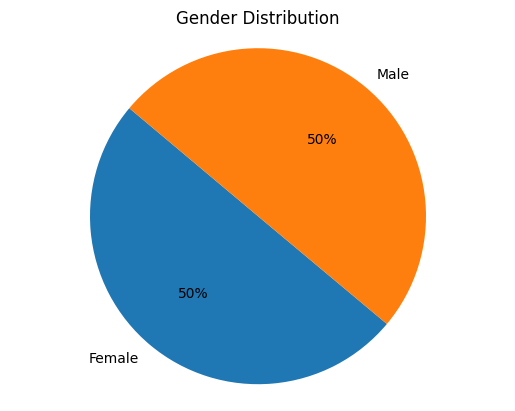

In [398]:
gender_counts = df['Gender'].value_counts()
# plotting tthe pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

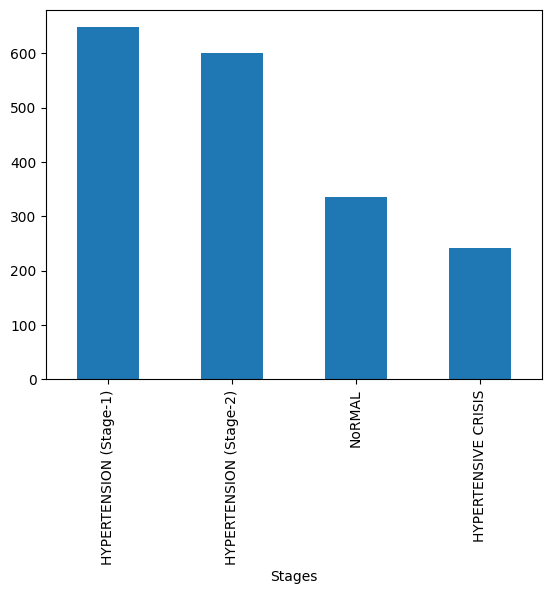

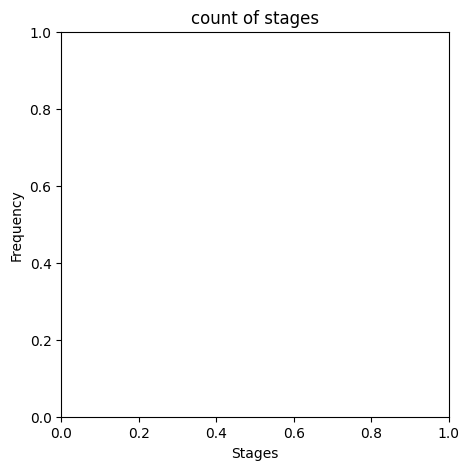

In [399]:
frequency = df['Stages'].value_counts()

frequency.plot(kind='bar')
plt.figure(figsize=(5,5))
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('count of stages')
plt.show()

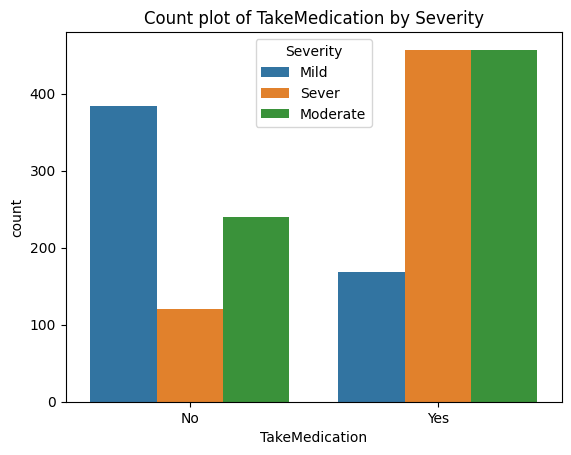

In [400]:
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show()

In [401]:
#Converting catelogical into numerical value
from sklearn.preprocessing import LabelEncoder
columns = ['Gender', 'Age', 'Whendiagnoused', 'Systolic', 'Diastolic','Severity' ,'History' ,'Patient' ,'TakeMedication' ,'BreathShortness' ,'VisualChanges' ,'NoseBleeding' ,'ControlledDiet' ,'Stages']
label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

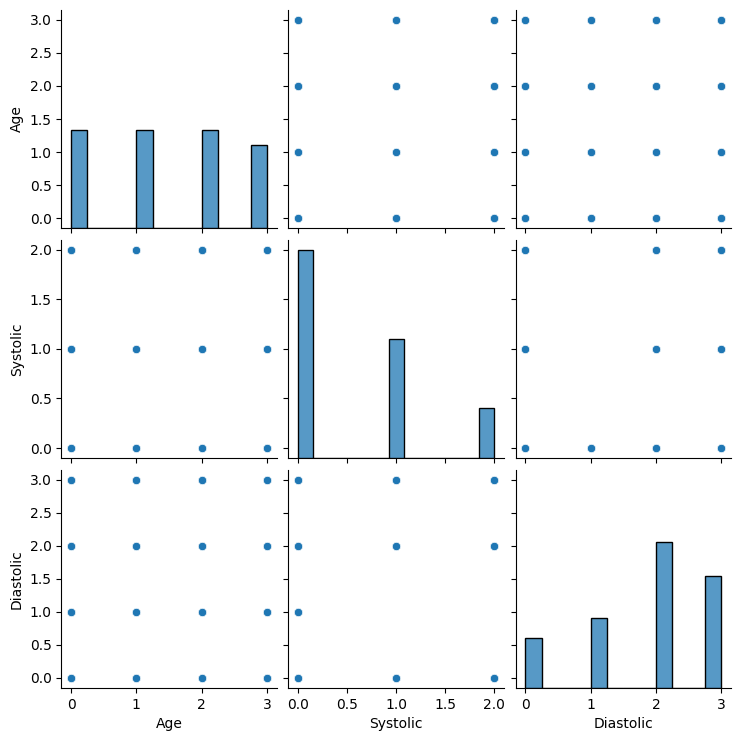

In [402]:
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.show()

In [403]:
#Splitting the data into X and Y
X = df.drop('Stages' , axis = 1)
X

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,0,2,0
1,0,0,1,0,0,0,0,0,0,1,0,2,0
2,1,1,1,0,0,0,0,0,0,1,0,2,0
3,0,1,1,0,0,0,0,0,0,1,0,2,0
4,1,2,1,0,0,0,0,0,0,1,0,2,0
5,0,2,1,0,0,0,0,0,0,1,0,2,0
6,1,3,1,0,0,0,0,0,0,1,0,2,0
7,0,3,1,0,0,0,0,0,0,1,0,2,0
8,1,0,1,0,0,2,0,0,0,1,0,2,0
9,1,1,1,1,1,2,1,1,0,1,1,3,1


In [404]:
# prompt: show full data in X

import pandas as pd
pd.set_option('display.max_rows', None)
X


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,0,2,0
1,0,0,1,0,0,0,0,0,0,1,0,2,0
2,1,1,1,0,0,0,0,0,0,1,0,2,0
3,0,1,1,0,0,0,0,0,0,1,0,2,0
4,1,2,1,0,0,0,0,0,0,1,0,2,0
5,0,2,1,0,0,0,0,0,0,1,0,2,0
6,1,3,1,0,0,0,0,0,0,1,0,2,0
7,0,3,1,0,0,0,0,0,0,1,0,2,0
8,1,0,1,0,0,2,0,0,0,1,0,2,0
9,1,1,1,1,1,2,1,1,0,1,1,3,1


In [405]:
Y = df ['Stages']
Y

,Stages
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [406]:
from sklearn.model_selection import train_test_split

In [407]:
#splitting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=300)

print(x_train.shape)
print(x_test.shape)
print (y_train.shape)
print(y_test.shape)



(1277, 13)
(548, 13)
(1277,)
(548,)


In [408]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train) # Now the model should fit without the error
y_pred = logistic_regression.predict(x_test)

acc_1r = accuracy_score(y_test,y_pred)
c_1r = classification_report(y_test,y_pred)

print( 'Accuracy Score: ',acc_1r)
print (c_1r)

Accuracy Score:  0.9799270072992701
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       206
           1       1.00      0.99      0.99       176
           2       0.98      1.00      0.99        79
           3       0.95      0.94      0.95        87

    accuracy                           0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [409]:
from sklearn. ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest. fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)
print( 'Accuracy Score: ', acc_rf)
print(c_rf)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       176
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        87

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [410]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model. fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)
print( 'Accuracy Score: ',acc_dt)
print(c_dt)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       176
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        87

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



In [411]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test,y_pred)
print( 'Accuracy Score: ', acc_nb)
print(c_nb)


Accuracy Score:  0.8886861313868614
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      0.65      0.79       176
           2       0.56      1.00      0.72        79
           3       1.00      1.00      1.00        87

    accuracy                           0.89       548
   macro avg       0.89      0.91      0.88       548
weighted avg       0.94      0.89      0.89       548



In [412]:
from sklearn.naive_bayes import MultinomialNB
mNB = MultinomialNB()
mNB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
acc_mnb = accuracy_score(y_test,y_pred)
c_mnb = classification_report(y_test,y_pred)
print( 'Accuracy Score: ', acc_mnb)
print(c_mnb)


Accuracy Score:  0.8886861313868614
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      0.65      0.79       176
           2       0.56      1.00      0.72        79
           3       1.00      1.00      1.00        87

    accuracy                           0.89       548
   macro avg       0.89      0.91      0.88       548
weighted avg       0.94      0.89      0.89       548



In [413]:
prediction = random_forest.predict([[1,0,1,0,0,0,0,0,0,1,0,2,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [414]:
prediction[0]

0

In [415]:
if prediction[0] == 0:
  print('NORMAL')
elif prediction[0] == 1:
  print('HYPERTENSION (Stage 1)')
elif prediction[0] == 2:
  print('HYPERTENSION(Stage 2)')
else :
  print('HYPERTENSIVE CRISIS')

NORMAL


In [416]:
model = pd. DataFrame({'Model': ['Linear Regression', 'Decision Tree Classifier', 'RandomForest Classifier',
'Gaussian Navie Bayes', 'Multinomial Navie Bayes'],
'Score' : [acc_1r, acc_dt, acc_rf, acc_nb, acc_mnb],})


In [417]:
model

,Model,Score
0,Linear Regression,0.979927
1,Decision Tree Classifier,1.000000
2,RandomForest Classifier,1.000000
3,Gaussian Navie Bayes,0.888686
4,Multinomial Navie Bayes,0.888686


In [418]:
import pickle
import warnings
pickle.dump(random_forest, open("model.pkl" , "wb"))


In [419]:
import sklearn
print(sklearn.__version__)


1.3.2
